# Installations

In [1]:

%%capture
#Functions
from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile

colors = [ "#E69F00", "#56B4E9", "#009E73", "#CC79A7", "#999999","#F0E442","#0072B2", "#D55E00" ]
palette = sns.color_palette(colors)

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.7, 
              rc={"lines.linewidth": 1.8, 'axes.linewidth':2, 
                                  "xtick.major.width":2,"ytick.major.width":2}, 
              palette = palette)

In [2]:
%%capture
import Cyclic_peptide_no_E1 as cy

In [11]:
def process_data(ic, excel_name, sheet_name, k0_input, condition_id):
    df = cy.load_data_frame(excel_name, sheet_name)
    dfs, cond = cy.sort_condition(df)
    df1 = dfs[condition_id]
    initial_conditions, params, tspan = cy.load_initial_conditions(df1, k0_input)
    data = df1[['F', "Ac", "E1", "E2", "E3"]].values
    t = sorted(df1['time'])
    return initial_conditions, params, tspan, data, t, df1

def fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k, num_iterations=10):
    # Load data and preprocess
    initial_conditions, params, tspan, data, t,e = process_data(ic, excel_name, sheet_name, k0_input, condition_id)

        # Perform final fitting using RMSEerror
    result = minimize(
        cy.error, params, args=(initial_conditions, t, data), nan_policy="omit", method="nelder")
    params.update(result.params)  # Update parameters with final result"""


    
    # Perform fitting
    for i in range(num_iterations):
        result = minimize(
            cy.error, params, args=(initial_conditions, t, data), nan_policy="omit", method="least_squares")
        params.update(result.params)  # Update parameters in each iteration


    
    # Extract parameter values
    k_values = pd.DataFrame({f"{name_k}": params.valuesdict().values()})
    
    simulated_data = cy.get_fitted_curve(initial_conditions, tspan = np.linspace(0, 2000, 10000), params = k_values.values.flatten())





    return k_values, e, simulated_data 

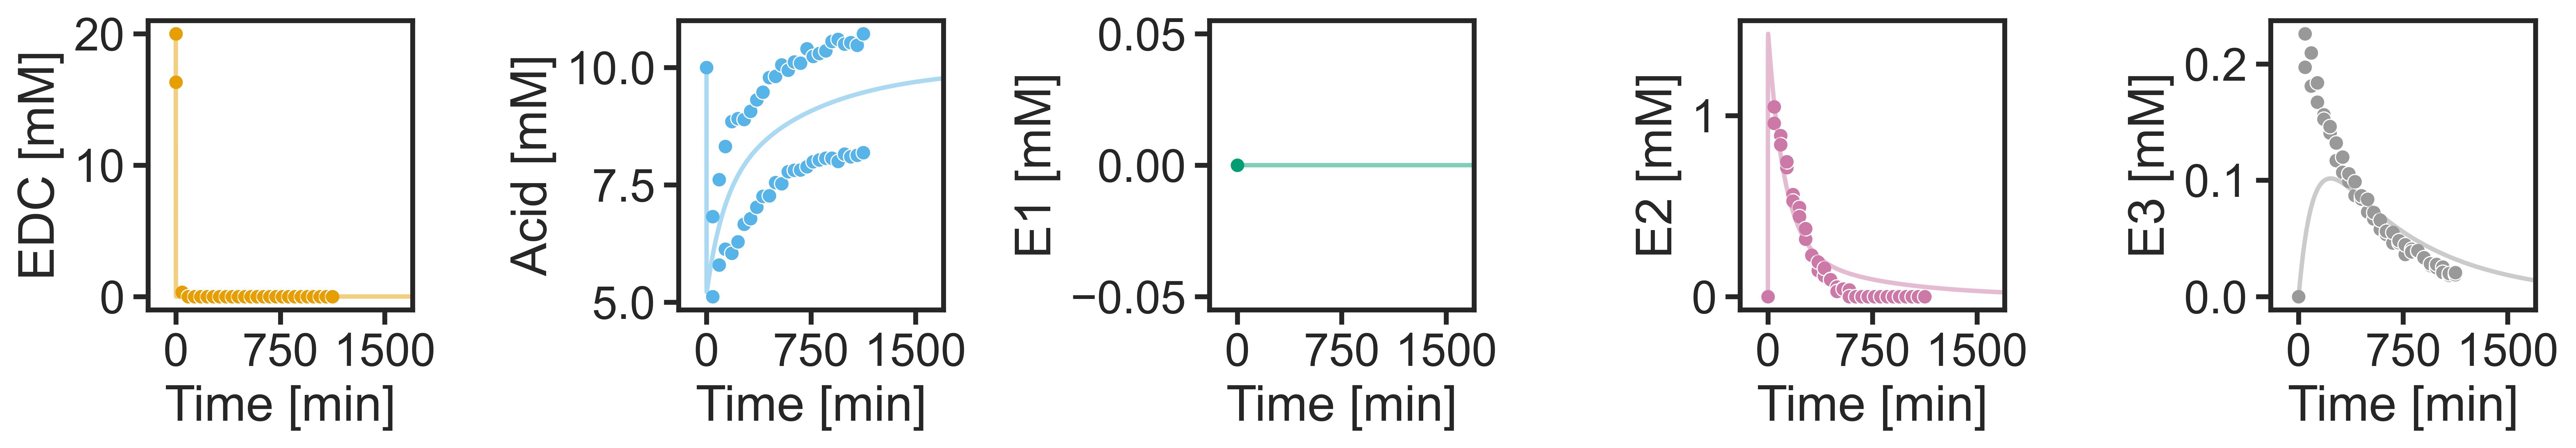

In [12]:
# 10 mM Acid and 20 mM EDC
ic = [20, 0, 10., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS"
sheet_name = "10 mM peptide 20 mM EDC"
k0_input = 0.0045
condition_id = 0
name_k = "AcFRMYRGD_1"

results1 = fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k, num_iterations=5)

fig, ax = cy.plot_fitted(results1[1], results1[2])
fig.dpi = 600
for i in ax:
    i.set(xlim=(-200, 1700), xticks=(0, 750, 1500))

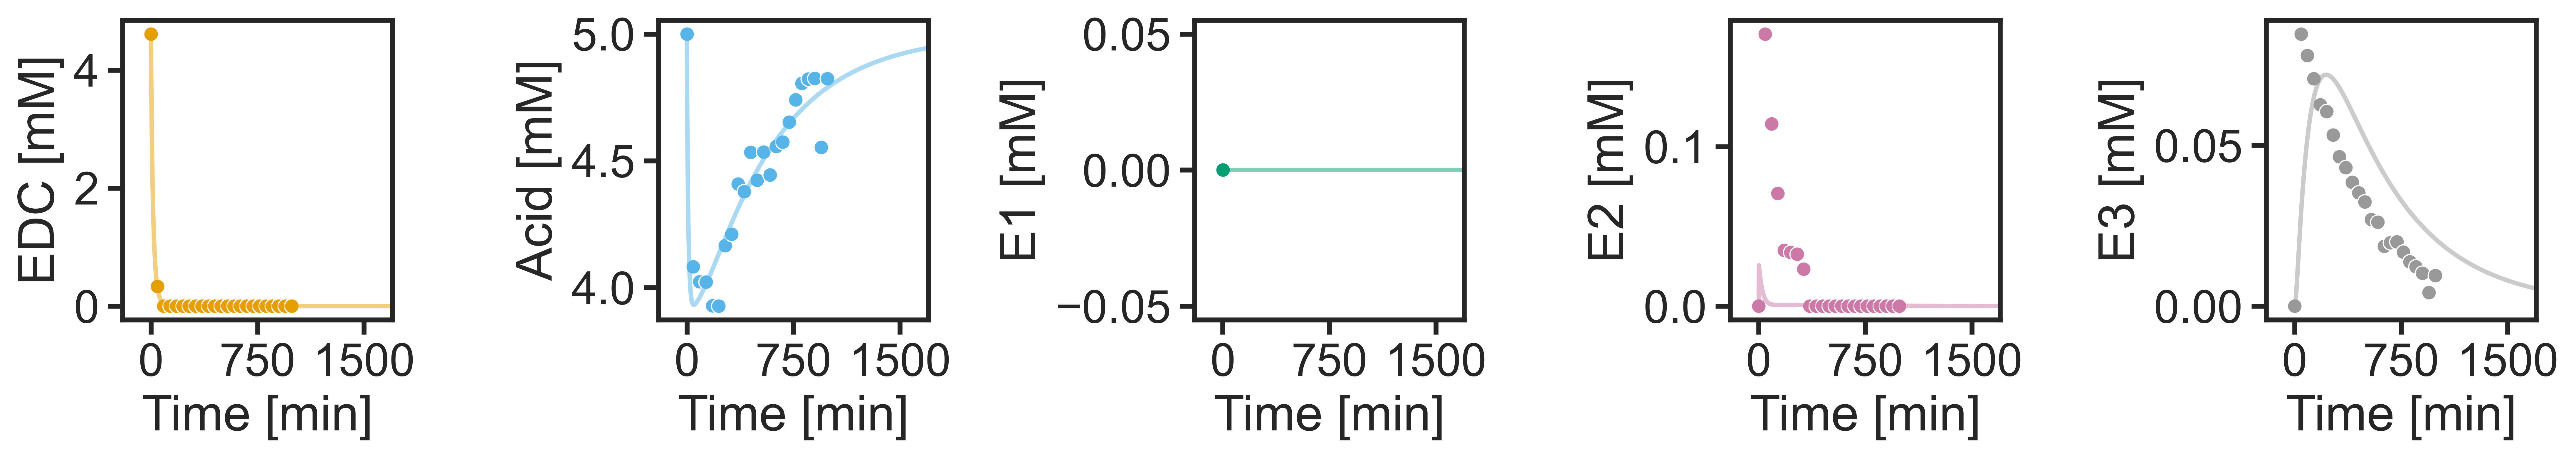

In [16]:
# 5 mM Acid and 5 mM EDC
ic = [5, 0, 5., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS"
sheet_name = "5 mM peptide 5 mM EDC"
k0_input = 0.0045
condition_id = 0
name_k = "AcFRMYRGD_2"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic, 
                                                          excel_name, 
                                                          sheet_name, 
                                                          k0_input, 
                                                          condition_id)

results2 = fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results2[1], results2[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

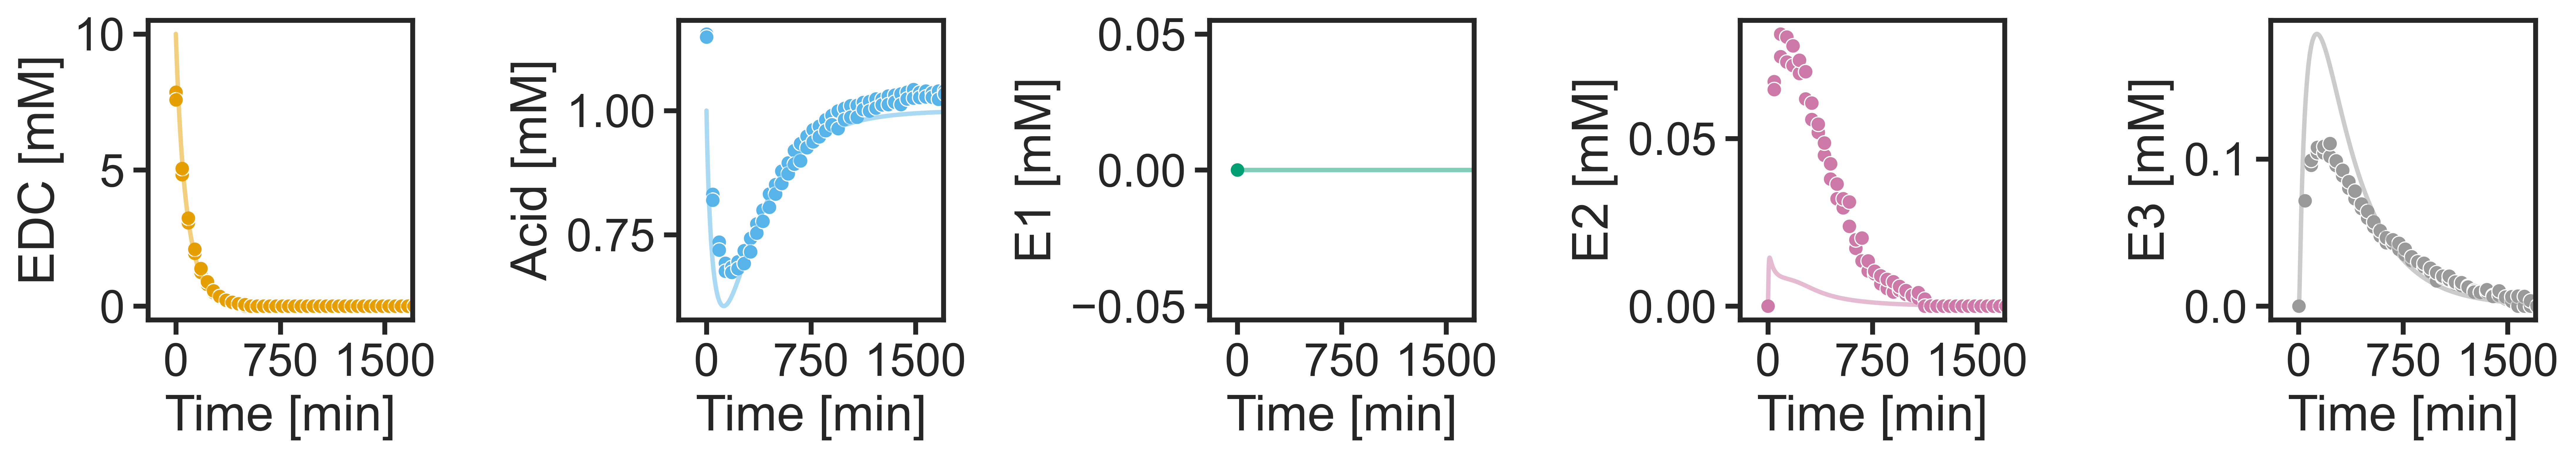

In [6]:
# 1 mM Acid and 10 mM EDC
ic = [10, 0, 1., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS"
sheet_name = "1 mM peptide 10 mM EDC"
k0_input = 0.0045
condition_id = 0
name_k = "AcFRMYRGD_3"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic, 
                                                          excel_name, 
                                                          sheet_name, 
                                                          k0_input, 
                                                          condition_id)

results3 = fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results3[1], results3[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

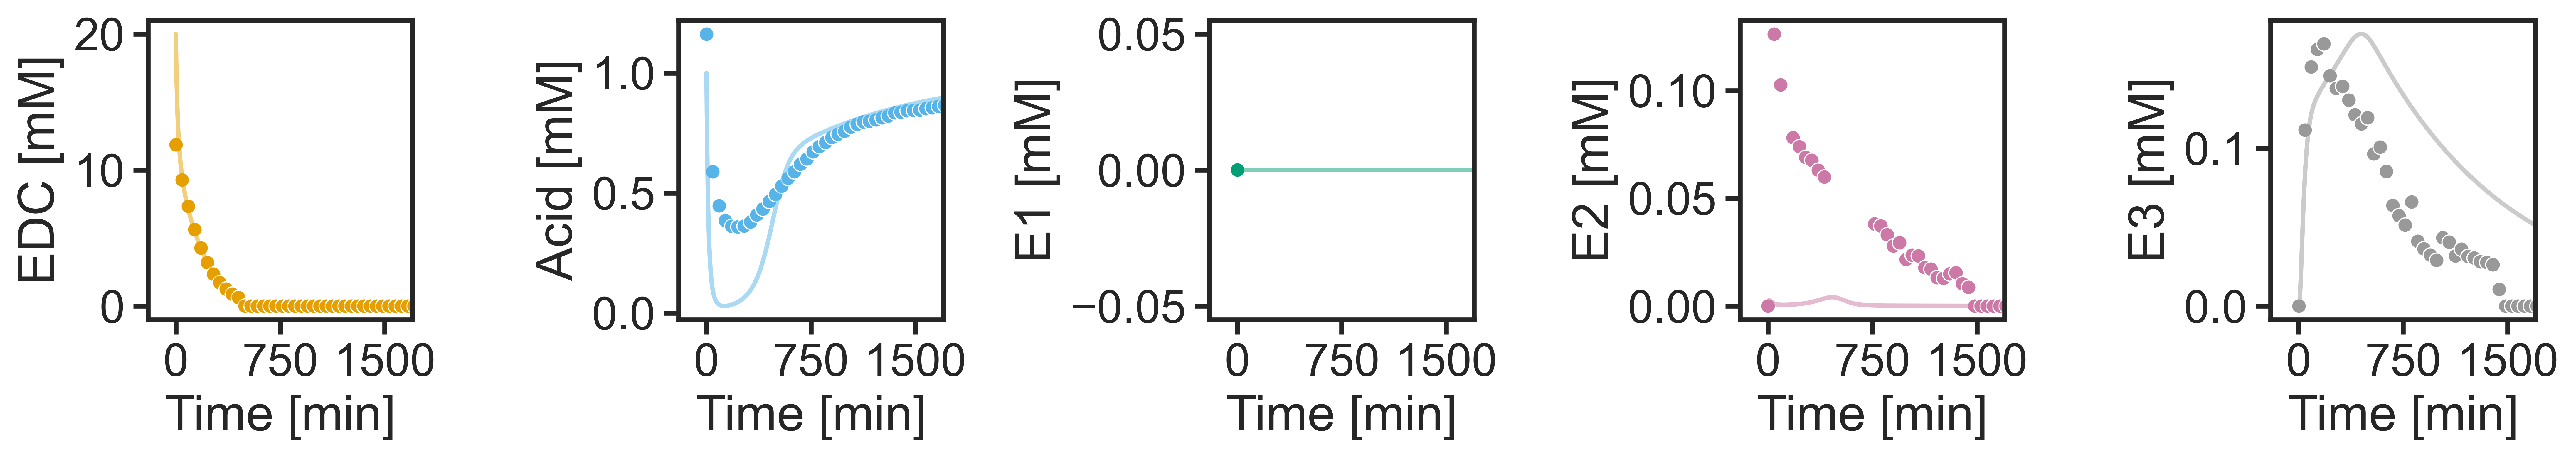

In [7]:
# 1 mM Acid and 20 mM EDC
ic = [20, 0, 1., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS"
sheet_name = "1 mM peptide 20 mM EDC"
k0_input = 0.0045
condition_id = 0
name_k = "AcFRMYRGD_4"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic, 
                                                          excel_name, 
                                                          sheet_name, 
                                                          k0_input, 
                                                          condition_id)

results4 = fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results4[1], results4[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

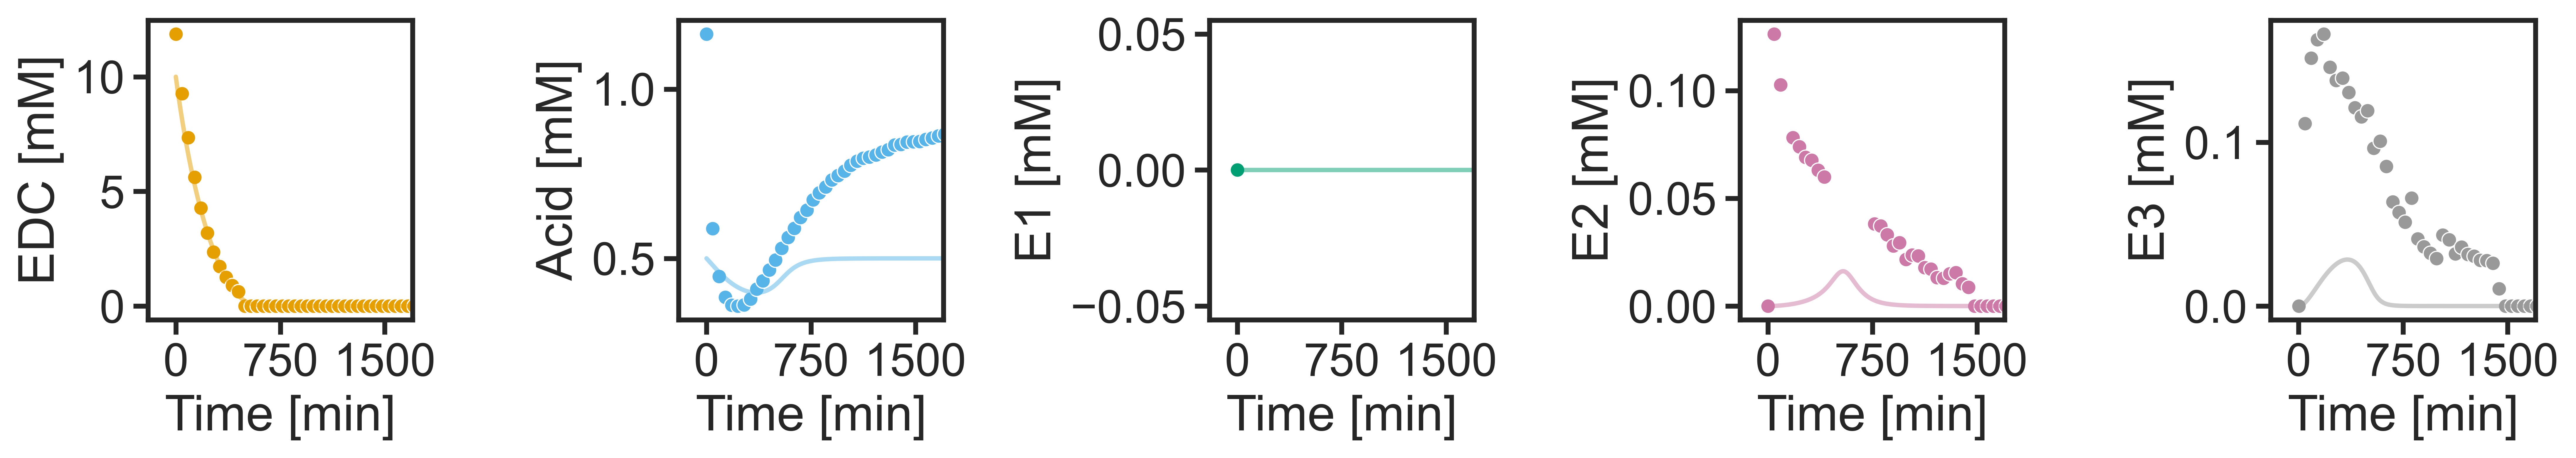

In [8]:
# 0.5 mM Acid and 10 mM EDC
ic = [10, 0, 0.5, 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS"
sheet_name = "1 mM peptide 20 mM EDC"
k0_input = 0.0045
condition_id = 0
name_k = "AcFRMYRGD_5"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic, 
                                                          excel_name, 
                                                          sheet_name, 
                                                          k0_input, 
                                                          condition_id)

results5 = fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results5[1], results5[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [3]:
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS" 
sheet_name = "10 mM peptide 20 mM EDC"
df = cy.load_data_frame(excel_name, sheet_name)
dfs, cond = cy.sort_condition(df)
k0s_input = [0.0045, 0.0045]

In [4]:
ic_1 = [20,0,10, 0, 0,0,0,0]
df1 = dfs[0]
initial_conditions, params, tspan = cy.load_initial_conditions(df1, k0s_input[0])
data = df1[['F', "Ac", "E1", "E2", "E3"]].values
t = sorted(df1['time'])

/Users/hsc/Dropbox/09_Collaborations/01_From Fabi/00_KineticModel/Old/Ac-FRGMYRGD-OH/Cyclic_peptide_no_E1.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tspan = np.linspace(df["time"][0], float(df["time"].tail(1)) + 1000, 1000)


In [7]:
for i in range(10):
    result = minimize(
        cy.error, params, args=(ic_1, t, data), nan_policy = "omit", method = "least_squares")
    # Actualizar los parámetros en cada iteración
params.update(result.params)
"""result = minimize(
    cy.error, params, args=(ic_1, t, data), nan_policy = "omit", method = "nelder")"""
# Actualizar los parámetros en cada iteración
params.update(result.params)
k_values = pd.DataFrame({"AcFRMYRGD'_1":params.valuesdict().values()})

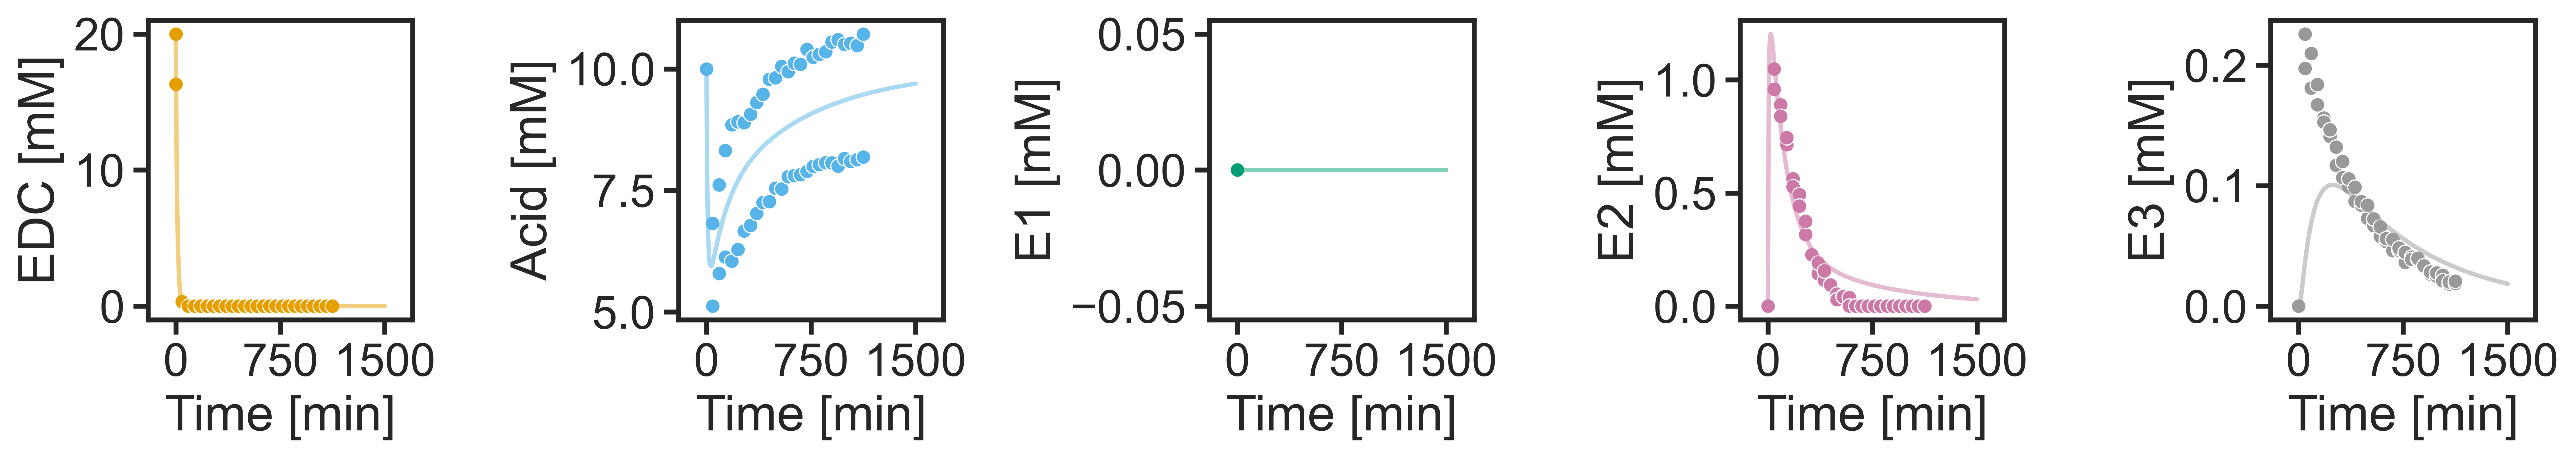

In [8]:
y1 = cy.get_fitted_curve(ic_1, tspan = np.linspace(0, 1500, 10000), params = params.valuesdict().values())
fig, ax = cy.plot_fitted(df1, y1)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [9]:
k_values

AcFRMYRGD'_1
0       0.004500
1       0.009975
2       0.102000
3       0.265505
4       0.393674
5       0.000000
6       0.065828
7       0.021227
8       0.079060
9       0.225155
10      0.001478
11      0.000000
12      0.007443
13      0.009725

In [10]:
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS" 
sheet_name = "5 mM peptide 5 mM EDC"
df = cy.load_data_frame(excel_name, sheet_name)
dfs, cond = cy.sort_condition(df)
k0s_input = [0.0045, 0.0045]

In [11]:
ic_2 = [5,0,5, 0, 0,0,0,0]
df2 = dfs[0]
initial_conditions, params, tspan = cy.load_initial_conditions(df2, k0s_input[0])
data = df2[['F', "Ac", "E1", "E2", "E3"]].values
t = sorted(df2['time'])

/Users/hsc/Dropbox/09_Collaborations/01_From Fabi/00_KineticModel/Old/Ac-FRGMYRGD-OH/Cyclic_peptide_no_E1.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tspan = np.linspace(df["time"][0], float(df["time"].tail(1)) + 1000, 1000)


In [12]:
for i in range(10):
    result = minimize(
        cy.error, params, args=(ic_2, t, data), nan_policy = "omit", method = "least_squares")
    # Actualizar los parámetros en cada iteración
    params.update(result.params)
result = minimize(
    cy.error, params, args=(ic_2, t, data), nan_policy = "omit", method = "nelder")
# Actualizar los parámetros en cada iteración
params.update(result.params)
k_values["AcFRGMYRGD_2"] = params.valuesdict().values()

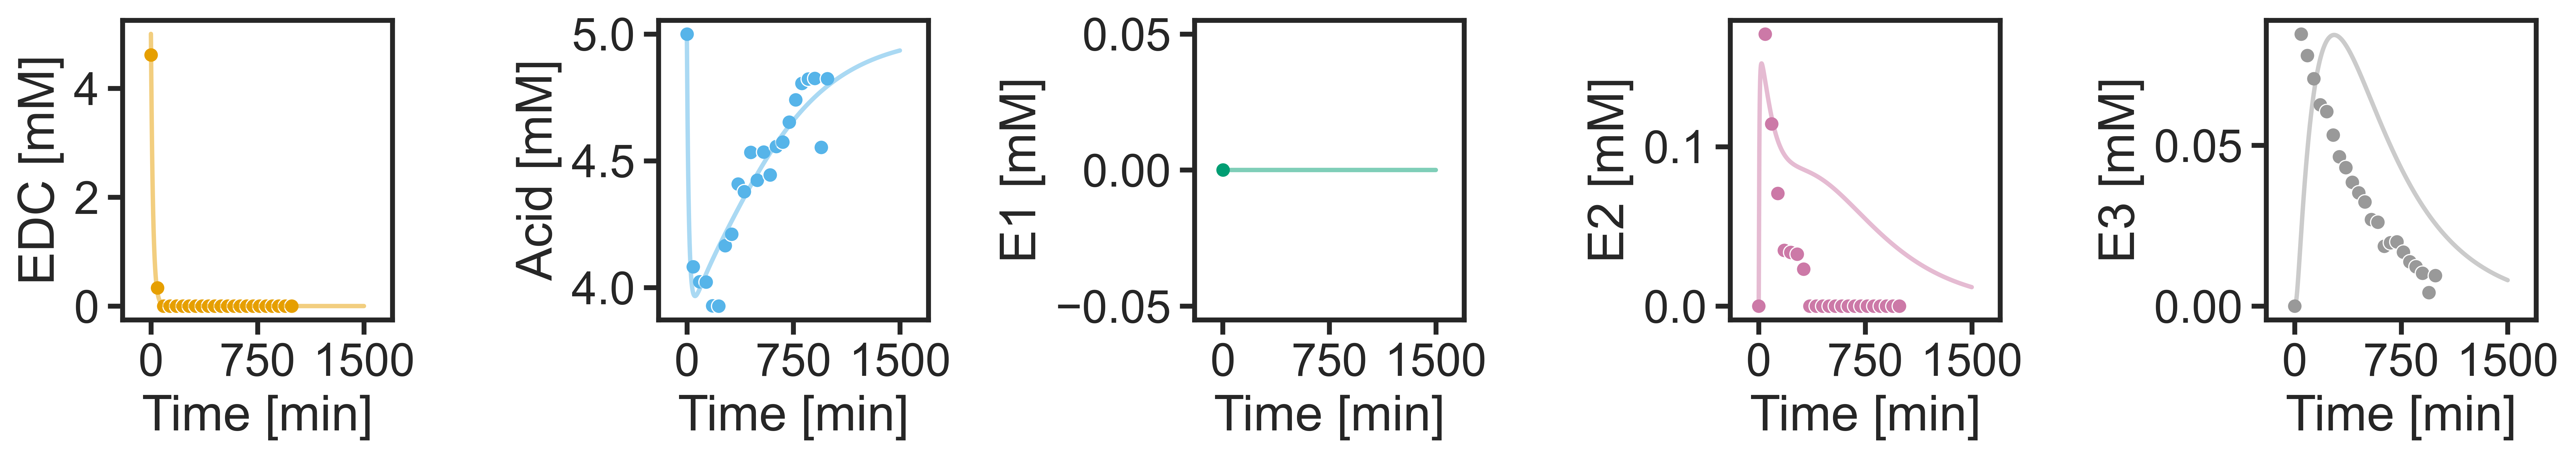

In [13]:
y2 = cy.get_fitted_curve(ic_2, tspan = np.linspace(0, 1500, 10000), params = params.valuesdict().values())
fig, ax = cy.plot_fitted(df2, y2)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [14]:
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS" 
sheet_name = "1 mM peptide 10 mM EDC"
df = cy.load_data_frame(excel_name, sheet_name)
dfs, cond = cy.sort_condition(df)
k0s_input = [0.0045, 0.0045]

ic_3 = [10,0,1, 0, 0,0,0,0]
df3 = dfs[0]
initial_conditions, params, tspan = cy.load_initial_conditions(df3, k0s_input[0])
data = df3[['F', "Ac", "E1", "E2", "E3"]].values
t = sorted(df3['time'])

/Users/hsc/Dropbox/09_Collaborations/01_From Fabi/00_KineticModel/Old/Ac-FRGMYRGD-OH/Cyclic_peptide_no_E1.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tspan = np.linspace(df["time"][0], float(df["time"].tail(1)) + 1000, 1000)


In [15]:
for i in range(10):
    result = minimize(
        cy.error, params, args=(ic_3, t, data), nan_policy = "omit", method = "least_squares")
    # Actualizar los parámetros en cada iteración
    params.update(result.params)
result = minimize(
    cy.error, params, args=(ic_3, t, data), nan_policy = "omit", method = "nelder")
# Actualizar los parámetros en cada iteración
params.update(result.params)
k_values["AcFRGMYRGD_3"] = params.valuesdict().values()

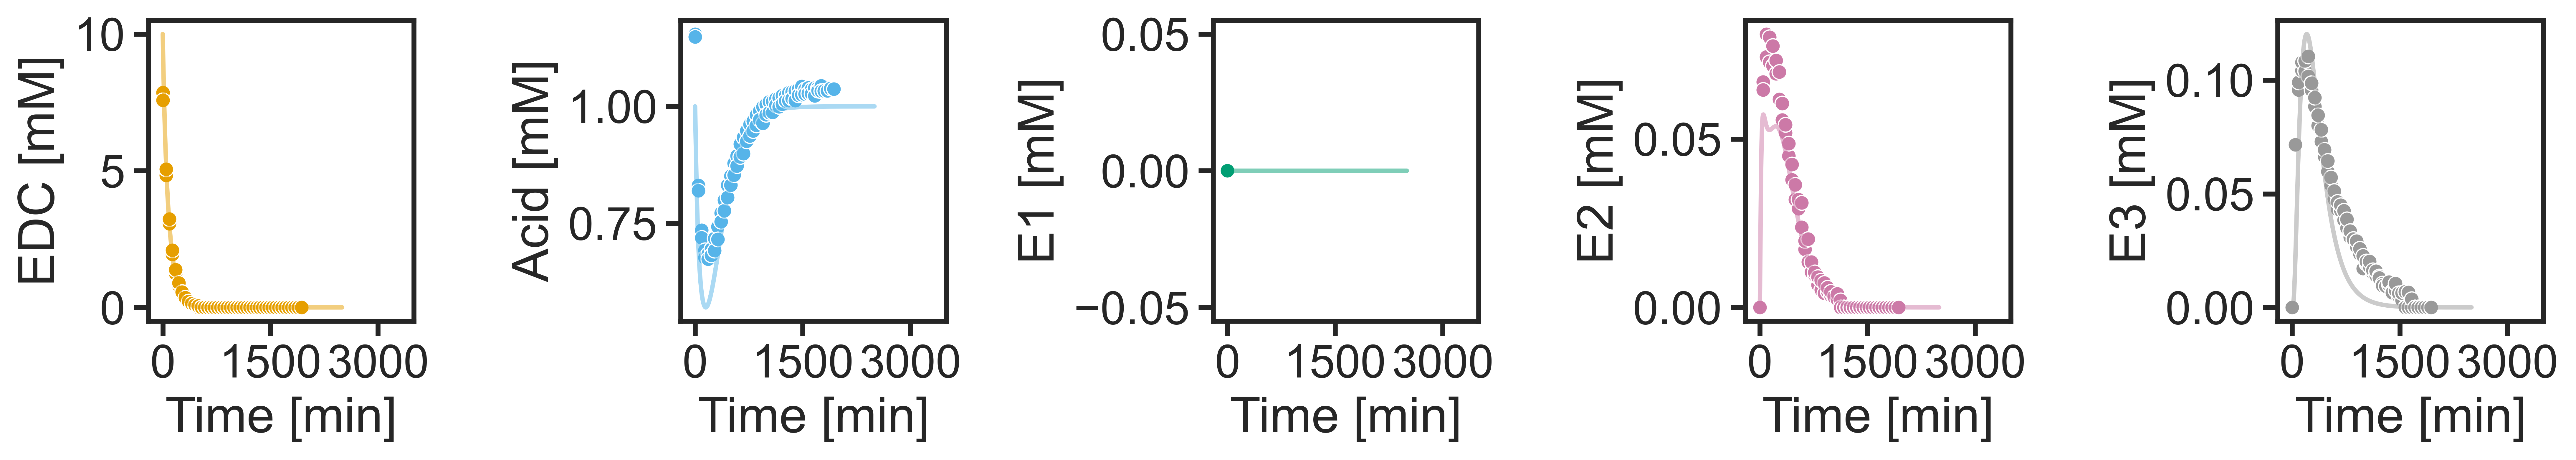

In [20]:
y3 = cy.get_fitted_curve(ic_3, tspan = np.linspace(0, 2500, 10000), params = params.valuesdict().values())
fig, ax = cy.plot_fitted(df3, y3)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 3500), xticks = (0, 1500, 3000))

In [21]:
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS" 
sheet_name = "1 mM peptide 20 mM EDC"
df = cy.load_data_frame(excel_name, sheet_name)
dfs, cond = cy.sort_condition(df)
k0s_input = [0.0045, 0.0045]

ic_4 = [20,0,1, 0, 0,0,0,0]
df4 = dfs[0]
initial_conditions, params, tspan = cy.load_initial_conditions(df4, k0s_input[0])
data = df4[['F', "Ac", "E1", "E2", "E3"]].values
t = sorted(df4['time'])

/Users/hsc/Dropbox/09_Collaborations/01_From Fabi/00_KineticModel/Old/Ac-FRGMYRGD-OH/Cyclic_peptide_no_E1.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tspan = np.linspace(df["time"][0], float(df["time"].tail(1)) + 1000, 1000)


In [25]:
for i in range(10):
    result = minimize(
        cy.error, params, args=(initial_conditions, t, data), nan_policy = "omit", method = "least_squares")
    # Actualizar los parámetros en cada iteración
    params.update(result.params)

# Actualizar los parámetros en cada iteración
params.update(result.params)
k_values["AcFRGMYRGD_4"] = params.valuesdict().values()

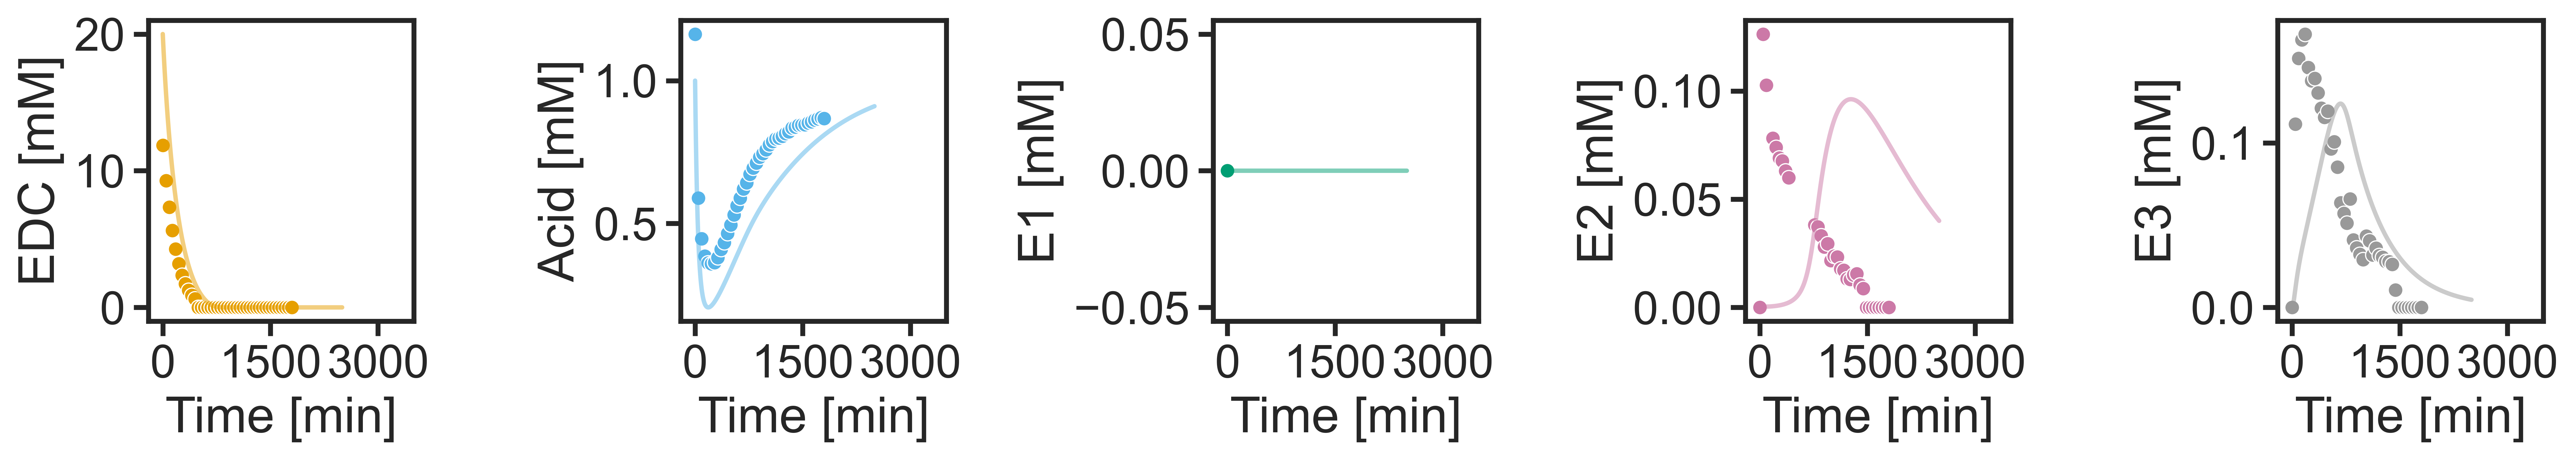

In [30]:
y4 = cy.get_fitted_curve(ic_4, tspan = np.linspace(0, 2500, 10000), params = k_values["AcFRGMYRGD_3"])
fig, ax = cy.plot_fitted(df4, y4)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 3500), xticks = (0, 1500, 3000))

In [32]:
excel_name = "template_depsipeptides_Fabi_AcFRGMYRGD_HS" 
sheet_name = "0,5 mM peptide 10 mM EDC"
df = cy.load_data_frame(excel_name, sheet_name)
dfs, cond = cy.sort_condition(df)
k0s_input = [0.0045, 0.0045]

ic_5 = [10,0,0.5, 0, 0,0,0,0]
df5 = dfs[0]
initial_conditions, params, tspan = cy.load_initial_conditions(df5, k0s_input[0])
data = df5[['F', "Ac", "E1", "E2", "E3"]].values
t = sorted(df5['time'])

/Users/hsc/Dropbox/09_Collaborations/01_From Fabi/00_KineticModel/Old/Ac-FRGMYRGD-OH/Cyclic_peptide_no_E1.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tspan = np.linspace(df["time"][0], float(df["time"].tail(1)) + 1000, 1000)


In [37]:
for i in range(20):
    result = minimize(
        cy.error, params, args=(ic_5, t, data), nan_policy = "omit", method = "least_squares")
    # Actualizar los parámetros en cada iteración
    params.update(result.params)

# Actualizar los parámetros en cada iteración
params.update(result.params)
k_values["AcFRGMYRGD_5"] = params.valuesdict().values()

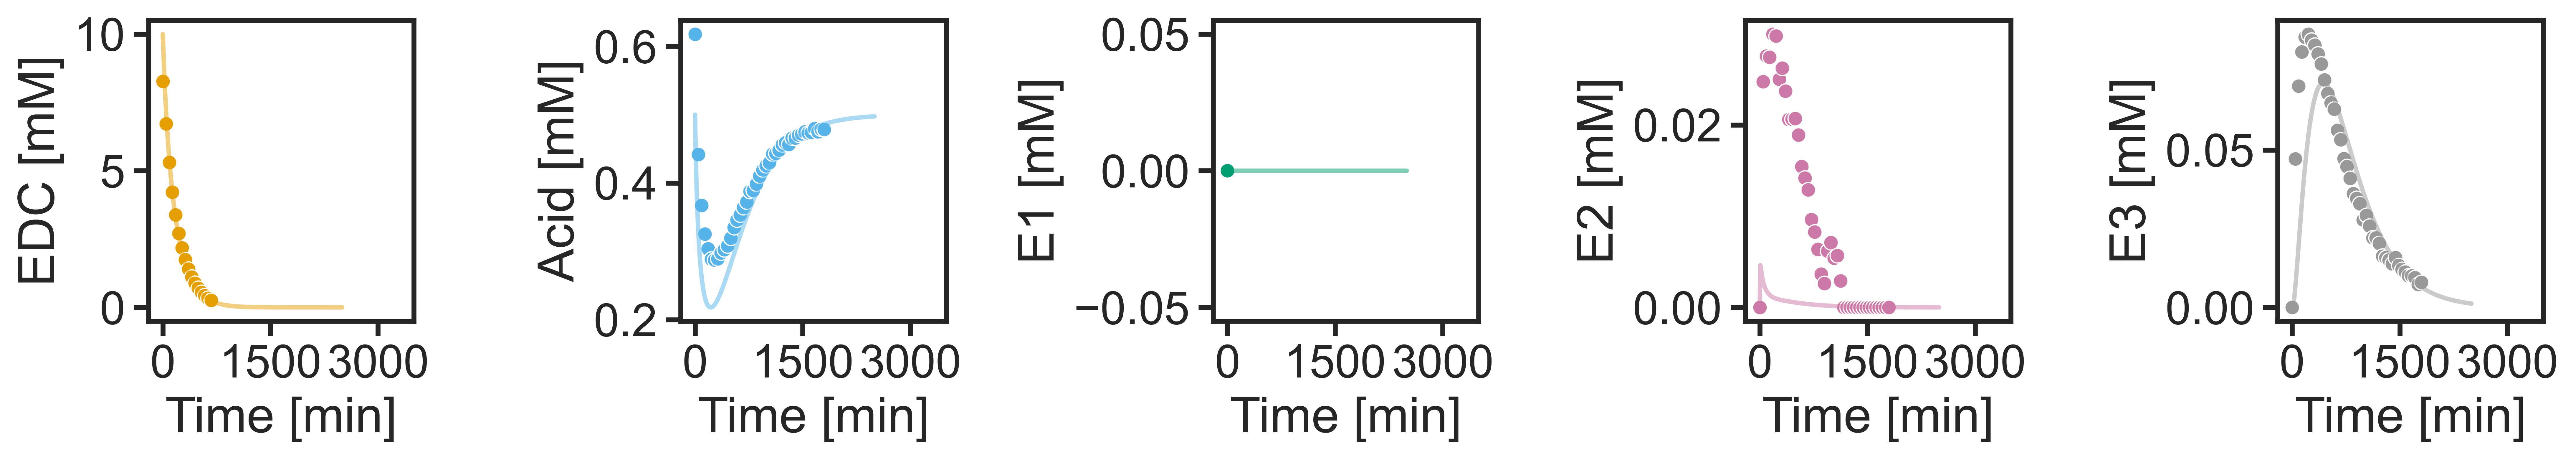

In [39]:
y5 = cy.get_fitted_curve(ic_5
                         , tspan = np.linspace(0, 2500, 10000), params = params.valuesdict().values())
fig, ax = cy.plot_fitted(df5, y5)
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 3500), xticks = (0, 1500, 3000))

In [14]:
names = ["00_10_1mM.xlsx","01_20_10mM.xlsx"]
for i, j, n in zip([df1, df2], [y1, y2], names):

    i.to_excel(f"experimental_{n}")
    j.to_excel(f"simulated_{n}")


/var/folders/bl/7gl6w7zj2gn6b_rq1ppnw95w0000gn/T/ipykernel_21089/1246211349.py:4: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  i.to_excel(f"experimental_{n}")
/var/folders/bl/7gl6w7zj2gn6b_rq1ppnw95w0000gn/T/ipykernel_21089/1246211349.py:5: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  j.to_excel(f"simulated_{n}")
